### EDA III
___

📌 **Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.**


In [1]:
import pandas as pd 
import numpy as np 
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/historico_tickets_limpio_pandas.csv', index_col=0)
df.sample(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
14397,SHLTET-3143596634,2019-05-11,713,26,Hardware,Solicitud,2 - Normal,3 - Alta,10,1,1 semestre,2019,Mayo
2013,GHLTNR-1042827875,2017-04-02,1147,48,Acceso/Login,Solicitud,2 - Normal,3 - Alta,0,5,1 semestre,2017,Abril


___
1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [3]:
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

En la *primera gráfica* tendremos que contestar la siguiente pregunta: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. 

Para eso tendréis que:

- Crear un subplot con dos gráficas.
- En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?
- En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?

In [4]:
"""columnas = ['severidad', 'prioridad']

fig, axes = plt.subplots(1, 2)
for indice, col in enumerate(columnas):
    sns.swarmplot(x= col, y= 'días_resolución', data = df, ax = axes[indice]);"""

"columnas = ['severidad', 'prioridad']\n\nfig, axes = plt.subplots(1, 2)\nfor indice, col in enumerate(columnas):\n    sns.swarmplot(x= col, y= 'días_resolución', data = df, ax = axes[indice]);"

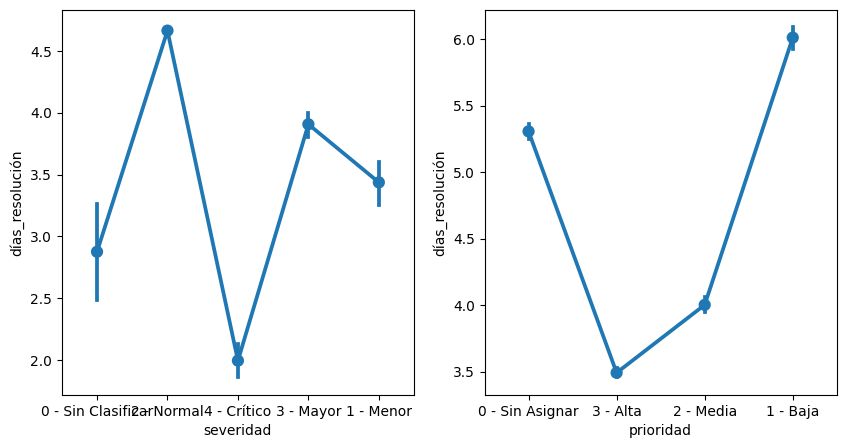

In [5]:
columnas = ['severidad', 'prioridad']

fig, axes = plt.subplots(1, 2)
for indice, col in enumerate(columnas):
    sns.pointplot(x= col, y= 'días_resolución', data = df, ax = axes[indice]);

- De media, con respecto a la severidad, observamos que, con mucha diferencia, los tickets que menos tardan en resolverse son los que tienen un nivel crítico de severidad (nivel 4), sin embargo, los siguientes que menos tiempo tardan en resolverse son los que están sin clasificar y los de severidad menor (nivel 1). Por último, los que más tardan en resolverse (y con mucha diferencia) son los de severidad normal (nivel 2).

- Con respecto a la prioridad, los que menos tardan en resolverse son los de prioridad alta (nivel 3) y media (nivel 2). En cambio, tardan menos en resolverse los que no tienen asignada prioridad que los que se asignan como prioridad baja (nivel 1).

___
En la *segunda gráfica* contestaremos a la siguiente pregunta: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. 

Para eso tendréis que:

- Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".
- Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.

In [6]:
df_problemas = df[(df['categoría'] == 'Acceso/Login') | (df['categoría'] == 'Software')]
df_problemas.head(2)


,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo


In [7]:
df_problemas['categoría'].unique()

array(['Acceso/Login', 'Software'], dtype=object)

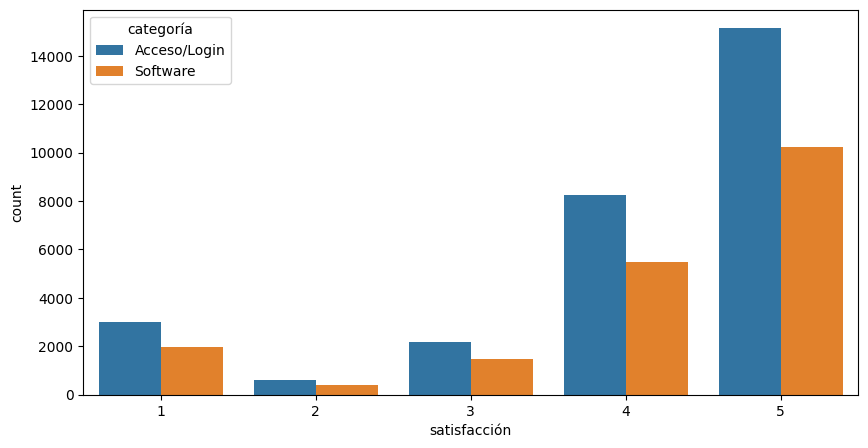

In [8]:
sns.countplot(x= 'satisfacción', hue= 'categoría', data = df_problemas);

En general, aunque la satisfacción es alta (mayoría de puntuaciones entre 4 y 5), no se observa relación entre el nivel de satisfacción y la categoría del ticket.

___
En la *tercera gráfica* contestaremos a las siguientes preguntas ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. Para contestar a esto haremos 3 gráficas independientes:
- En la primera gráfica deberemos, ¿Cuáles son los empleados que más tickets atienden?:
    - Sacar el número de tickets por empleado. **Pista** 💡 Para esto tendremos que usar un groupby.
    - Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.

In [9]:
df.head(1)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio


In [10]:
#Vamos a ver quienes son los 10 empleados con mayor resolución de tickets:
df_empleados_top = df.groupby('id_empleado')['id_ticket'].count().sort_values(ascending=False).reset_index().head(10)
df_empleados_top

,id_empleado,id_ticket
0,754,73
1,285,73
2,636,71
3,523,69
4,79,69
5,1341,69
6,442,68
7,326,68
8,482,68
9,1448,68


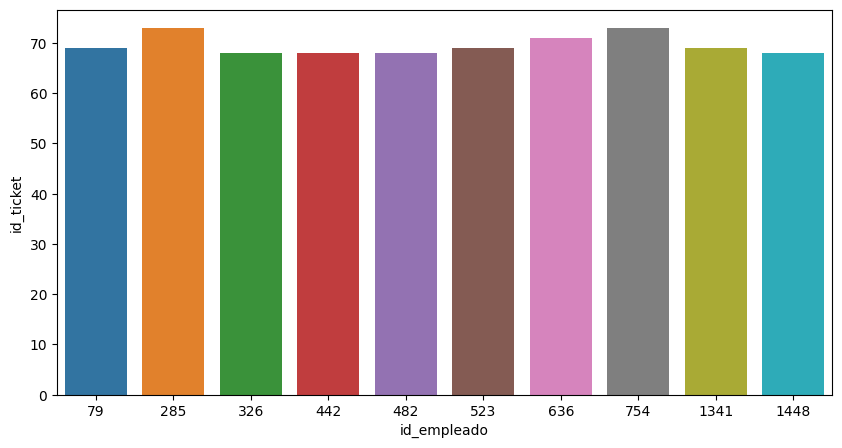

In [11]:
sns.barplot(x= 'id_empleado', y= 'id_ticket', data= df_empleados_top);

- En la segunda gráfica, ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?
    - Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.
    - Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.
    - Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado

In [12]:
empleados = df.groupby('id_empleado')['id_ticket'].count().sort_values(ascending=False).reset_index()
empleados['id_empleado']

0        754
1        285
2        636
3        523
4         79
        ... 
1995    1618
1996      72
1997    1195
1998      99
1999     793
Name: id_empleado, Length: 2000, dtype: int64

In [19]:
empleados_top = list(empleados['id_empleado'].head(10))
print(empleados_top)

empleados_bottom = list(empleados['id_empleado'].tail(10))
print(empleados_bottom)


[754, 285, 636, 523, 79, 1341, 442, 326, 482, 1448]
[1041, 1792, 607, 686, 1384, 1618, 72, 1195, 99, 793]


In [20]:
df_empleados_top = df[df['id_empleado'].isin(empleados_top)]
df_empleados_bottom = df[df['id_empleado'].isin(empleados_bottom)]

In [25]:
df_empleados_top.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
598,GDLTNR-5142539863,2016-06-18,636,18,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,1,5,1 semestre,2016,Junio
778,GDLTSR-2642714958,2016-12-10,285,49,Sistema,Solicitud,2 - Normal,0 - Sin Asignar,16,5,2º semestre,2016,Diciembre
1204,GHLENR-2042667510,2016-10-24,1341,45,Acceso/Login,Problema,2 - Normal,3 - Alta,0,1,2º semestre,2016,Octubre
1358,GHLESR-9542419989,2016-02-19,1448,9,Sistema,Problema,2 - Normal,3 - Alta,5,1,1 semestre,2016,Febrero
1997,GHLTSR-0242509985,2016-05-19,1448,39,Sistema,Solicitud,2 - Normal,3 - Alta,1,5,1 semestre,2016,Mayo


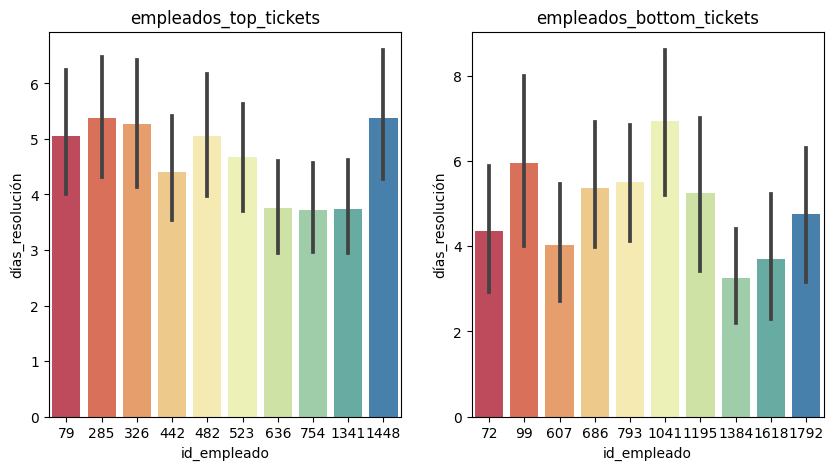

In [28]:
fig, axes = plt.subplots(1, 2)

sns.barplot(x= 'id_empleado', y= 'días_resolución', data = df_empleados_top, ax = axes[0], palette="Spectral")
sns.barplot(x= 'id_empleado', y= 'días_resolución', data = df_empleados_bottom, ax = axes[1], palette="Spectral")

axes[0].set_title('empleados_top_tickets')
axes[1].set_title('empleados_bottom_tickets');

Según vemos en los gráficos, sí parece que los empleados con mayor número de tickets tardan más en resolverlos.

- En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:

    📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.

Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.

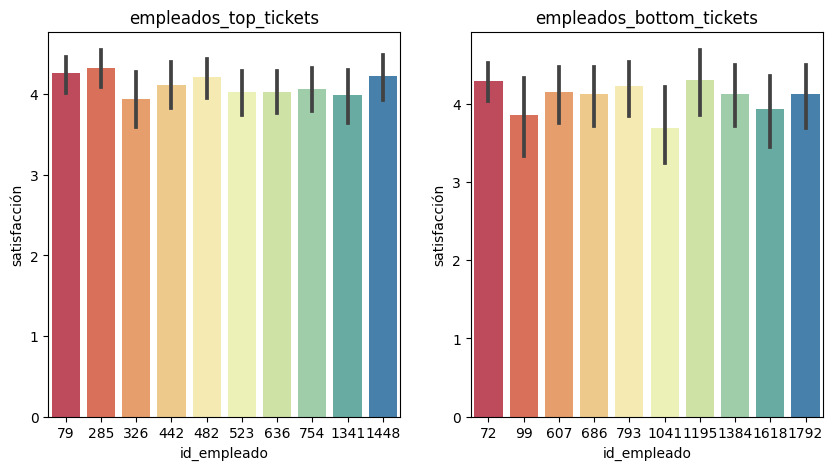

In [29]:
fig, axes = plt.subplots(1, 2)

sns.barplot(x= 'id_empleado', y= 'satisfacción', data = df_empleados_top, ax = axes[0], palette="Spectral")
sns.barplot(x= 'id_empleado', y= 'satisfacción', data = df_empleados_bottom, ax = axes[1], palette="Spectral")

axes[0].set_title('empleados_top_tickets')
axes[1].set_title('empleados_bottom_tickets');

En este caso, no parece haber diferencias entre la satifacción de los clientes atendidos por empleados con mayor número de tickets y los que resuelven menos tickets.